In [1]:
# Code modified and fixed from Stock Technical Analysis with Python
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import talib as ta
import numpy as np

In [15]:
df = pd.read_csv("../data/ltchourly.csv")
df.index = pd.to_datetime(df.utc)
del df['utc']

In [16]:
df.index

DatetimeIndex(['2016-10-03 19:00:00', '2016-10-03 20:00:00',
               '2016-10-03 21:00:00', '2016-10-03 22:00:00',
               '2016-10-03 23:00:00', '2016-10-04 00:00:00',
               '2016-10-04 01:00:00', '2016-10-04 02:00:00',
               '2016-10-04 03:00:00', '2016-10-04 04:00:00',
               ...
               '2018-02-15 09:00:00', '2018-02-15 10:00:00',
               '2018-02-15 11:00:00', '2018-02-15 12:00:00',
               '2018-02-15 13:00:00', '2018-02-15 14:00:00',
               '2018-02-15 15:00:00', '2018-02-15 16:00:00',
               '2018-02-15 17:00:00', '2018-02-15 18:00:00'],
              dtype='datetime64[ns]', name='utc', length=12001, freq=None)

In [17]:
#df = df.loc['2017-11-20T06:00:00':'2017-12-01T23:59:00']

In [18]:
tradeperiod = df.index.max() - df.index.min()
(tradeperiod / np.timedelta64(1, 'h')).astype(int)

11999

In [19]:
df.tail()

,close,high,low,open,time,vol
utc,,,,,,
2018-02-15 14:00:00,218.71,222.34,216.25,221.90,1518717600,67107.79
2018-02-15 15:00:00,217.26,219.39,216.97,218.71,1518721200,38850.16
2018-02-15 16:00:00,215.86,217.41,210.68,217.27,1518724800,85622.06
2018-02-15 17:00:00,207.51,215.86,206.77,215.86,1518728400,99368.25
2018-02-15 18:00:00,210.09,211.45,207.44,207.51,1518732000,44560.96


In [20]:
df.describe()

,close,high,low,open,time,vol
count,12001.000000,12001.000000,12001.000000,12001.000000,1.200100e+04,12001.000000
mean,54.600779,55.237990,53.898103,54.580892,1.497132e+09,41034.785123
std,73.341918,74.375942,72.187600,73.323543,1.247232e+07,61552.852193
min,3.380000,3.440000,3.190000,3.380000,1.475532e+09,0.000000
25%,3.940000,3.960000,3.920000,3.940000,1.486332e+09,4642.780000
50%,30.470000,30.860000,30.020000,30.460000,1.497132e+09,22835.120000
75%,58.330000,58.820000,57.830000,58.330000,1.507932e+09,49753.950000
max,370.410000,401.760000,364.620000,370.550000,1.518732e+09,910752.980000


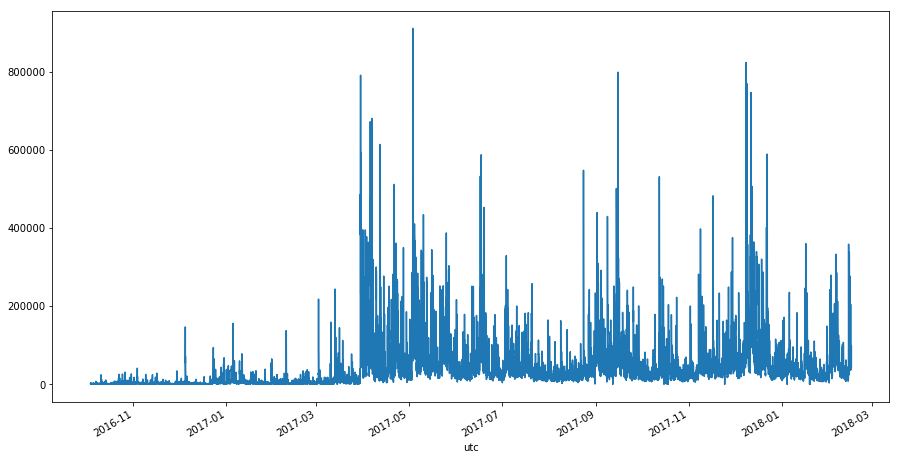

In [21]:
df.vol.plot(figsize=(15,8))

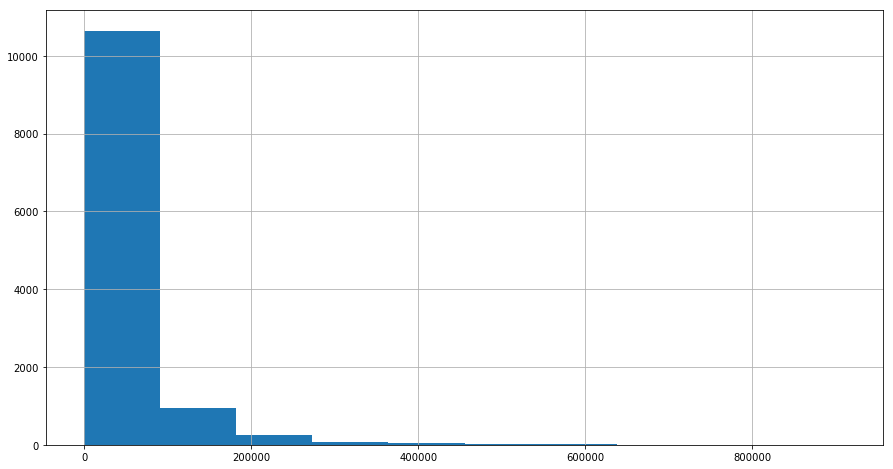

In [22]:
df.vol.hist(figsize=(15,8))

In [23]:
df.to_csv('./ltchourly-modified.csv')

In [24]:
df = pd.read_csv("./ltchourly-modified.csv")

In [25]:
import talib as ta

In [26]:
df['bb_high'],df['bb_mid'],df['bb_low'] = ta.BBANDS(np.asarray(df.close),
                                                  timeperiod=7,nbdevup=1.3,nbdevdn=1.3,matype=0)

In [27]:
df['rsi'] = ta.RSI(np.asarray(df.close),timeperiod=14)

In [28]:
df['close_lag1'] = df.close.shift(1)
df['vol_lag1'] = df.vol.shift(1)
df['bb_low_lag1'] = df.bb_low.shift(1)
df['bb_mid_lag1'] = df.bb_mid.shift(1)
df['bb_high_lag1'] = df.bb_high.shift(1)
df['close_lag2'] = df.close.shift(2)
df['vol_lag2'] = df.vol.shift(2)
df['bb_low_lag2'] = df.bb_low.shift(2)
df['bb_mid_lag2'] = df.bb_mid.shift(1)
df['bb_high_lag2'] = df.bb_high.shift(2)
df['rsi_lag1'] = df.rsi.shift(1)
df['rsi_lag2'] = df.rsi.shift(2)

In [29]:
df[30:31]

,utc,close,high,low,open,time,vol,bb_high,bb_mid,bb_low,...,bb_low_lag1,bb_mid_lag1,bb_high_lag1,close_lag2,vol_lag2,bb_low_lag2,bb_mid_lag2,bb_high_lag2,rsi_lag1,rsi_lag2
30,2016-10-05 01:00:00,3.82,3.83,3.81,3.82,1475640000,1336.78,3.826949,3.82,3.813051,...,3.813051,3.82,3.826949,3.81,1085.18,3.813123,3.82,3.829734,49.21719,44.595439


In [30]:
df.utc = pd.to_datetime(df.utc)

In [31]:
tradeperiod = df.utc.max() - df.utc.min()

In [32]:
(1-.23)**(82/365)-1

-0.057026938391176896

In [33]:
(tradeperiod / np.timedelta64(1, 'h')).astype(int)

11999

In [34]:
len(df)

12001

In [1]:
from sklearn.model_selection import ParameterGrid

### PARAMETERS
bb_timeperiod = 8
bb_stddev = 1.3
rsi_timeperiod = 8
rsi_buy = 35
rsi_sell = 80
yr_trading_periods = 365. * 24.
trading_frequency = 1
show_graphs = True

# scenarios
scenario_grid = {'timeperiod': [4,8,12,24,36],
              'stddev': [1.3, 1.4, 1.5, 1.6],
              'buy': [20, 25, 30, 35, 40],
              'sell': [75, 80, 85, 90]}

In [16]:
for idx, scenario in enumerate(list(ParameterGrid(scenario_grid))):
    bb_timeperiod = scenario['timeperiod']
    bb_stddev = scenario['stddev']
    rsi_timeperiod = scenario['timeperiod']
    rsi_buy = scenario['buy']
    rsi_sell = scenario['sell']
    
    print(idx, bb_timeperiod, bb_stddev, rsi_timeperiod, rsi_buy, rsi_sell)

0 4 1.3 4 20 75
1 8 1.3 8 20 75
2 12 1.3 12 20 75
3 24 1.3 24 20 75
4 36 1.3 36 20 75
5 4 1.4 4 20 75
6 8 1.4 8 20 75
7 12 1.4 12 20 75
8 24 1.4 24 20 75
9 36 1.4 36 20 75
10 4 1.5 4 20 75
11 8 1.5 8 20 75
12 12 1.5 12 20 75
13 24 1.5 24 20 75
14 36 1.5 36 20 75
15 4 1.6 4 20 75
16 8 1.6 8 20 75
17 12 1.6 12 20 75
18 24 1.6 24 20 75
19 36 1.6 36 20 75
20 4 1.3 4 20 80
21 8 1.3 8 20 80
22 12 1.3 12 20 80
23 24 1.3 24 20 80
24 36 1.3 36 20 80
25 4 1.4 4 20 80
26 8 1.4 8 20 80
27 12 1.4 12 20 80
28 24 1.4 24 20 80
29 36 1.4 36 20 80
30 4 1.5 4 20 80
31 8 1.5 8 20 80
32 12 1.5 12 20 80
33 24 1.5 24 20 80
34 36 1.5 36 20 80
35 4 1.6 4 20 80
36 8 1.6 8 20 80
37 12 1.6 12 20 80
38 24 1.6 24 20 80
39 36 1.6 36 20 80
40 4 1.3 4 20 85
41 8 1.3 8 20 85
42 12 1.3 12 20 85
43 24 1.3 24 20 85
44 36 1.3 36 20 85
45 4 1.4 4 20 85
46 8 1.4 8 20 85
47 12 1.4 12 20 85
48 24 1.4 24 20 85
49 36 1.4 36 20 85
50 4 1.5 4 20 85
51 8 1.5 8 20 85
52 12 1.5 12 20 85
53 24 1.5 24 20 85
54 36 1.5 36 20 85
55 4 1.6 

In [14]:
summary_df = pd.DataFrame(
    {'Summary':['Return','Std Dev','Sharpe (Rf=0%)'],'Trade':[2.0, 0.15, 1.2], 'Buy&Hold':[3.0, 0.20, 2.0]})
summary_df = summary_df[['Summary','Trade','Buy&Hold']]
summary_df

,Summary,Trade,Buy&Hold
0,Return,2.00,3.0
1,Std Dev,0.15,0.2
2,Sharpe (Rf=0%),1.20,2.0


In [24]:
results = pd.DataFrame([{'scenario':0, 'strategy':'trade', 'return':2.0, 'stddev':0.15, 'sharpe':1.2}, 
                        {'scenario':0, 'strategy':'buy&hold', 'return':3.0, 'stddev':0.16, 'sharpe':1.3},
                        {'scenario':1, 'strategy':'buy&hold', 'return':1.0, 'stddev':0.10, 'sharpe':0.2},
                        {'scenario':1, 'strategy':'buy&hold', 'return':1.1, 'stddev':0.05, 'sharpe':0.3}])
grouped = results.groupby('scenario')
for key, item in grouped:
    print(grouped.get_group(key), "\n\n")

   return  scenario  sharpe  stddev  strategy
0     2.0         0     1.2    0.15     trade
1     3.0         0     1.3    0.16  buy&hold 


   return  scenario  sharpe  stddev  strategy
2     1.0         1     0.2    0.10  buy&hold
3     1.1         1     0.3    0.05  buy&hold 




In [32]:
results = []
results.extend([{'scenario':0, 'strategy':'trade', 'return':2.0, 'stddev':0.15, 'sharpe':1.2}, 
                {'scenario':0, 'strategy':'buy&hold', 'return':3.0, 'stddev':0.16, 'sharpe':1.3}])
results.extend([{'scenario':1, 'strategy':'buy&hold', 'return':1.0, 'stddev':0.10, 'sharpe':0.2},
                {'scenario':1, 'strategy':'buy&hold', 'return':1.1, 'stddev':0.05, 'sharpe':0.3}])
results_df = pd.DataFrame(results)
results_df

,return,scenario,sharpe,stddev,strategy
0,2.0,0,1.2,0.15,trade
1,3.0,0,1.3,0.16,buy&hold
2,1.0,1,0.2,0.10,buy&hold
3,1.1,1,0.3,0.05,buy&hold


In [33]:
grouped = results_df.groupby('scenario')
for key, item in grouped:
    print(grouped.get_group(key), "\n\n")

   return  scenario  sharpe  stddev  strategy
0     2.0         0     1.2    0.15     trade
1     3.0         0     1.3    0.16  buy&hold 


   return  scenario  sharpe  stddev  strategy
2     1.0         1     0.2    0.10  buy&hold
3     1.1         1     0.3    0.05  buy&hold 




In [31]:
r = np.array([{'scenario':0, 'strategy':'trade', 'return':2.0, 'stddev':0.15, 'sharpe':1.2}, 
 {'scenario':0, 'strategy':'buy&hold', 'return':3.0, 'stddev':0.16, 'sharpe':1.3}])
r
r.flatten()

array([ {'scenario': 0, 'strategy': 'trade', 'return': 2.0, 'stddev': 0.15, 'sharpe': 1.2},
       {'scenario': 0, 'strategy': 'buy&hold', 'return': 3.0, 'stddev': 0.16, 'sharpe': 1.3}], dtype=object)